<a href="https://colab.research.google.com/github/ryanfa03/FreshMate-MachineLearning/blob/main/FreshMate_FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FreshMate Project Requirement and Needs**
*   Objective: Image Detection to output the ripeness types of unripe, ripe, and rotten fruits.
*   Model Architecture: Convolutional Neural Network (CNN)
*   Framework: TensorFlow

## **Import the Required Library**

 Importing modules for image processing, visualization, and TensorFlow model usage.


In [ ]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

# Interactive widgets
from ipywidgets import widgets
from IPython.display import display

## **Gathering and Load Dataset**

Download the 'Fruit Ripeness Classifier' dataset from Kaggle using the Kaggle API

In [ ]:
!kaggle datasets download -d 'dudinurdiyansah/fruit-ripeness-classifier'

Dataset URL: https://www.kaggle.com/datasets/dudinurdiyansah/fruit-ripeness-classifier
License(s): unknown
100% 1.11G/1.11G [00:13<00:00, 99.9MB/s]
100% 1.11G/1.11G [00:13<00:00, 87.5MB/s]


Extract the contents of the downloaded 'fruit-ripeness-classifier.zip' file into a directory named 'fruit-ripeness-classifier.

In [ ]:
import zipfile

with zipfile.ZipFile('fruit-ripeness-classifier.zip', 'r') as zip_ref:
    zip_ref.extractall('fruit-ripeness-classifier')

Randomly select and display two images from each fruit/vegetable category in the dataset, showcasing their visual differences based on ripeness or condition (e.g., ripe, unripe, rotten).

In [ ]:
BASE_DIR = r'/content/fruit-ripeness-classifier/DatasetV2'

# List of fruit names with categories
categories = [
    # Ripe categories
    "RipeApple", "RipeBanana", "RipeDragonFruit",  "RipeGrape",
    "RipeGuava", "RipeOrange", "RipePapaya", "RipePineapple",
    "RipePomegranate", "RipeStrawberry",
    # Unripe categories
    "UnripeApple", "UnripeBanana", "UnripeDragonFruit", "UnripeGrape",
    "UnripeGuava", "UnripeOrange", "UnripePapaya", "UnripePineapple",
    "UnripePomegranate", "UnripeStrawberry",
    # Rotten Categories
    "RottenApple", "RottenBanana", "RottenDragonFruit", "RottenGrape",
    "RottenGuava", "RottenOrange", "RottenPapaya", "RottenPineapple",
    "RottenPomegranate", "RottenStrawberry"
]

# Loop to randomly select and display images from each category
for category in categories:
    category_dir = os.path.join(BASE_DIR, category)
    if os.path.isdir(category_dir):
        file_names = os.listdir(category_dir)

        if len(file_names) >= 2:
            sample_files = random.sample(file_names, k=2)
        else:
            sample_files = file_names

        sample_paths = [os.path.join(category_dir, fname) for fname in sample_files]

        # Displaying images
        for img_path in sample_paths:
            try:
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.axis('Off')
                plt.title(category)
                plt.show()
            except Exception as e:
                print(f"Failed to load image {img_path}: {e}")
    else:
        print(f"Directory {category_dir} does not exist.")


Create a text file (fruit_labels.txt) and write a list of fruit/vegetable labels (categorized by ripe, unripe, and rotten) into the file for future use.

In [ ]:
# List of labels to write to the file
labels = [
    # Ripe categories
    "RipeApple", "RipeBanana", "RipeDragonFruit",  "RipeGrape",
    "RipeGuava", "RipeOrange", "RipePapaya", "RipePineapple",
    "RipePomegranate", "RipeStrawberry",
    # Unripe categories
    "UnripeApple", "UnripeBanana", "UnripeDragonFruit", "UnripeGrape",
    "UnripeGuava", "UnripeOrange", "UnripePapaya", "UnripePineapple",
    "UnripePomegranate", "UnripeStrawberry",
    # Rotten Categories
    "RottenApple", "RottenBanana", "RottenDragonFruit", "RottenGrape",
    "RottenGuava", "RottenOrange", "RottenPapaya", "RottenPineapple",
    "RottenPomegranate", "RottenStrawberry"]

file_name = "fruit_labels.txt"

# Open the file to write and write the label into the file
with open(file_name, "w") as file:
    for label in labels:
        file.write(label + "\n")

print(f"File '{file_name}' successfully created.")


File 'fruit_labels.txt' successfully created.


## **Split Dataset Into Training and Validation**

Create training and validation datasets using TensorFlow from a specified dataset directory. The datasets are optimized by caching, shuffling, and prefetching for better performance during training.

In [ ]:
# Dataset main directory
BASE_DIR = r'/content/fruit-ripeness-classifier/DatasetV2'

# Creating a training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,    # 20% for validation, 80% for training
    subset="training",
    seed=123,                # Set seeds to ensure consistent data sharing
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Creating a validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Optimizing datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 23993 files belonging to 30 classes.
Using 19195 files for training.
Found 23993 files belonging to 30 classes.
Using 4798 files for validation.


Extracts the category names from the training dataset to understand the different classes present in the dataset.

In [ ]:
data_cat = train_dataset.class_names

In [ ]:
data_cat

['RipeApple',
 'RipeBanana',
 'RipeDragonFruit',
 'RipeGrape',
 'RipeGuava',
 'RipeOrange',
 'RipePapaya',
 'RipePineapple',
 'RipePomegranate',
 'RipeStrawberry',
 'RottenApple',
 'RottenBanana',
 'RottenDragonFruit',
 'RottenGrape',
 'RottenGuava',
 'RottenOrange',
 'RottenPapaya',
 'RottenPineapple',
 'RottenPomegranate',
 'RottenStrawberry',
 'UnripeApple',
 'UnripeBanana',
 'UnripeDragonFruit',
 'UnripeGrape',
 'UnripeGuava',
 'UnripeOrange',
 'UnripePapaya',
 'UnripePineapple',
 'UnripePomegranate',
 'UnripeStrawberry']

## **Model Building**

Creates a data augmentation pipeline to increase the diversity of the training dataset by applying random transformations such as flipping, translation, contrast changes, and zoom.

In [ ]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Imports the ResNet50 model from Keras applications and initializes TensorFlow with optimizers for model training.

In [ ]:
from keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras import  optimizers

Initializes the ResNet50 model with ImageNet weights, excluding the top classification layer and setting the input shape to 224x224 with 3 color channels.

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Sets the first 100 layers of the base ResNet50 model as non-trainable, so they are frozen and their weights are not updated during training

In [ ]:
fine_tune_at = 100  # Retrain after the 100th layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Creates a new Keras model by stacking layers sequentially. This model includes data augmentation, the pre-trained base ResNet50 model, followed by global average pooling, dropout, and two dense layers for classification.

In [ ]:
model = tf.keras.models.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(len(data_cat),activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,853,854 (91.00 MB)

 Trainable params: 19,719,070 (75.22 MB)

 Non-trainable params: 4,134,784 (15.77 MB)

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)

Compiles the Keras model with the specified optimizer, loss function, and evaluation metric. The optimizer is used for updating model weights, 'categorical_crossentropy' is the loss function for classification tasks, and 'accuracy' is used to evaluate the model’s performance.

In [ ]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

## **Model Training**

Sets up and trains the Keras model with various callbacks including saving the best model, early stopping with restoration of the best weights, and reducing the learning rate on plateau. The history variable stores the training history for further analysis.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback to save the best model
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True)

# Callback to stop training if val_accuracy > 91%
early_stopping_cb = EarlyStopping(monitor='val_accuracy',
                                  min_delta=0.005,
                                  patience=7,
                                  mode='max',
                                  restore_best_weights=True,
                                  verbose=1)

# Callback to reduce learning rate when val_loss does not improve
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.2,
                                 patience=3,
                                 verbose=1,
                                 min_delta=0.005,
                                 mode='min')
history = model.fit(
    train_dataset_final,
    epochs=25,
    validation_data=validation_dataset_final,
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb]
)

Epoch 1/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 203s 272ms/step - accuracy: 0.5966 - loss: 1.4232 - val_accuracy: 0.8095 - val_loss: 0.6253 - learning_rate: 0.0010
Epoch 2/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 164s 274ms/step - accuracy: 0.8605 - loss: 0.4307 - val_accuracy: 0.8985 - val_loss: 0.3262 - learning_rate: 0.0010
Epoch 3/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 165s 275ms/step - accuracy: 0.9160 - loss: 0.2677 - val_accuracy: 0.8702 - val_loss: 0.4572 - learning_rate: 0.0010
Epoch 4/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 166s 277ms/step - accuracy: 0.9250 - loss: 0.2218 - val_accuracy: 0.9335 - val_loss: 0.2301 - learning_rate: 0.0010
Epoch 5/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 166s 278ms/step - accuracy: 0.9405 - loss: 0.1767 - val_accuracy: 0.9448 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 6/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 165s 275ms/step - accuracy: 0.9528 - loss: 0.1473 - val_accuracy: 0.9314 - val_loss: 0.2389 - learning_rate: 0.0010
Epoch 7/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 165s 275ms/step - accura

## **Model Evaluation**

Evaluates the model's performance on the validation dataset and plots the accuracy and loss over epochs to visualize training progress.

150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.9807 - loss: 0.1025
Test accuracy: 0.9808253645896912


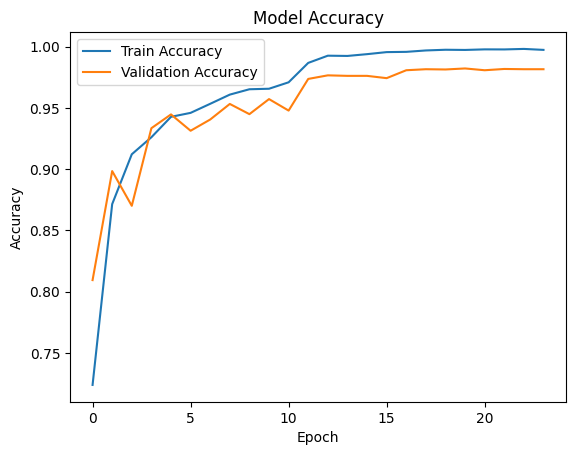

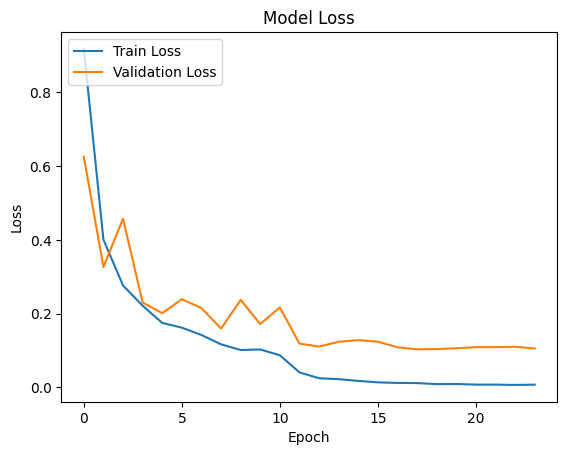

In [ ]:
# Evaluate the model's performance on the validation dataset
# Since your earlier code doesn't separate test data explicitly, we use validation_dataset_final
test_loss, test_acc = model.evaluate(validation_dataset_final)
print('Test accuracy:', test_acc)  # Print the test accuracy for reference

# Plot the training and validation accuracy over epochs
# This visualizes how the model's accuracy improved during training
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Model Accuracy')  # Add a title to the plot
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.legend(loc='upper left')  # Add a legend for training and validation accuracy
plt.show()  # Display the plot

# Plot the training and validation loss over epochs
# This shows how the loss decreased during training and validation
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Add a title to the plot
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.legend(loc='upper left')  # Add a legend for training and validation loss
plt.show()  # Display the plot

Calculates and visualizes the model’s performance using a confusion matrix and classification report for the validation dataset.

<Figure size 1600x1600 with 0 Axes>

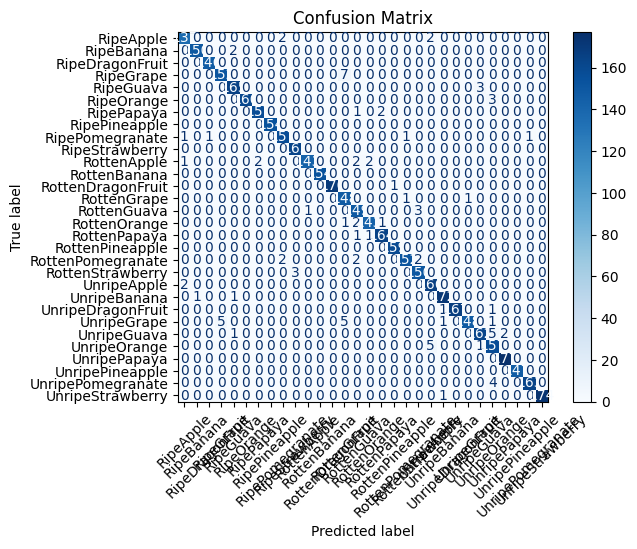

                   precision    recall  f1-score   support

        RipeApple       0.97      0.97      0.97       141
       RipeBanana       0.99      0.99      0.99       152
  RipeDragonFruit       0.99      1.00      1.00       146
        RipeGrape       0.97      0.96      0.96       159
        RipeGuava       0.98      0.98      0.98       168
       RipeOrange       1.00      0.98      0.99       163
       RipePapaya       0.99      0.98      0.98       160
    RipePineapple       1.00      1.00      1.00       154
  RipePomegranate       0.98      0.98      0.98       161
   RipeStrawberry       0.98      1.00      0.99       163
      RottenApple       0.99      0.95      0.97       150
     RottenBanana       1.00      1.00      1.00       154
RottenDragonFruit       1.00      0.99      1.00       171
      RottenGrape       0.92      0.99      0.95       150
      RottenGuava       0.95      0.97      0.96       153
     RottenOrange       0.98      0.97      0.98       

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted classes from the model on the validation dataset
# Collect all predictions and their true labels from the validation dataset
y_true = []
y_pred = []

for images, labels in validation_dataset_final:
    predictions = model.predict(images, verbose=0)  # Get predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted class indices
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Get true class indices (assuming categorical labels)

# Convert to numpy arrays for metric calculations
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the list of class names for better interpretation of the confusion matrix
classes = data_cat  # `data_cat` from your earlier code contains the class names

# Display the confusion matrix as a heatmap
plt.figure(figsize=(16, 16))  # Set the figure size for better readability
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)  # Create the display object
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Plot the confusion matrix with a blue colormap
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Display the confusion matrix

# Calculate and print the classification report
# The report includes metrics like precision, recall, and F1-score for each class
report = classification_report(y_true, y_pred, target_names=classes)
print(report)  # Display the classification report in text format


## **Implementation and Testing**

Creates a file upload widget for image prediction and defines functions to preprocess images, make predictions, and display results.

In [ ]:
import ipywidgets as widgets
from io import BytesIO
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Widget uploader
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Class list for prediction
classes = data_cat

def file_predict(filename, file_content, out, threshold=0.7):
    """Functions to make predictions and display results with notifications if the image is not recognized."""
    # Load and preprocess the image
    image = tf.keras.utils.load_img(BytesIO(file_content), target_size=(224, 224))
    image_array = tf.keras.utils.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions with the model
    prediction = model.predict(image_array, verbose=0)[0]
    confidence_score = np.max(prediction)  # Highest probability
    predicted_index = np.argmax(prediction)

    with out:
        # Display the imaage
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Predicted: {classes[predicted_index]} ({confidence_score:.2f})")
        plt.show()

        if confidence_score < threshold:
            print(f"Warning: '{filename}' does not appear to be a recognized fruit. Please upload a valid fruit image.")
        else:
            print(f"The predicted class for '{filename}' is {classes[predicted_index]} with a confidence of {confidence_score:.2f}.")

def on_upload_change(change):
    """ Function to retrieve files from the widget and run predictions. """
    with out:
        out.clear_output()
        for filename, file_info in change['new'].items():
            file_content = file_info['content']  # Retrieve byte string from file
            file_predict(filename, file_content, out)

# Observation of changes to uploader
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

## **Deployment**

Saving model that has been trained.

In [ ]:
from google.colab import files
files.download("best_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Option to save the model architecture in JSON format and model weights in binary format.

In [ ]:
import tensorflow as tf
import json
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("best_model.keras")

# Save the architecture to a JSON file
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json.dump(json.loads(model_json), json_file)

# Save the weights to a binary file
weights = model.get_weights()
weights_binary = np.array(weights, dtype=object)  # Convert to numpy object array
with open("model_weights.bin", "wb") as bin_file:
    np.save(bin_file, weights_binary)

print("Model architecture saved to 'model_architecture.json'")
print("Model weights saved to 'model_weights.bin'")

Model architecture saved to 'model_architecture.json'
Model weights saved to 'model_weights.bin'
